In [107]:
from sklearn_extra.cluster import KMedoids
import pandas as pd
import plotnine as p9
import kmedoids

In [108]:
%store -r umap_embeddings
%store -r dist_matrix
%store -r famd_embeding

In [109]:
# using famd analysis
df = pd.DataFrame()
df['x'] = famd_embeding.iloc[:,0]
df['y'] = famd_embeding.iloc[:,1]



cluster_obj = KMedoids(n_clusters=5, 
                           metric='euclidean',
                           method='alternate', init='build', 
                           max_iter=300, 
                           random_state=42).fit(famd_embeding)

df["preds"] = cluster_obj.labels_
df["preds"] = df["preds"].apply(str)


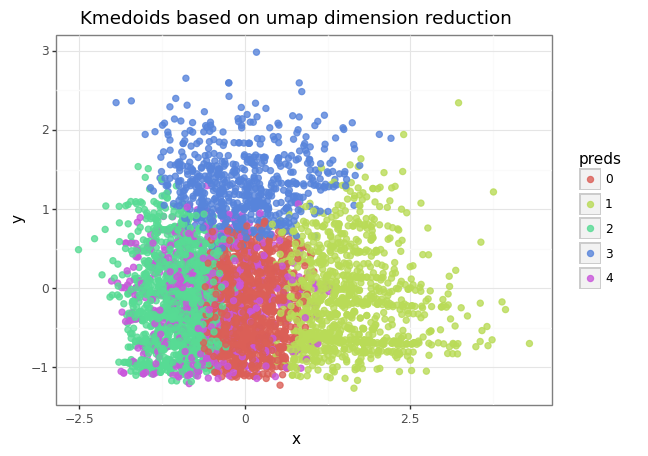

<ggplot: (125956544380)>

In [110]:

p1 = (p9.ggplot(df, p9.aes(x='x', y='y', fill='preds', color='preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('Kmedoids based on famd dimension reduction')
      + p9.theme_bw())
p1

In [111]:
# using UMAP Analysis
df = pd.DataFrame()
df['x'] = umap_embeddings[:,0]
df['y'] = umap_embeddings[:,1]


cluster_obj_with_umap = KMedoids(n_clusters=5, 
                           metric='euclidean',
                           method='alternate', init='build', 
                           max_iter=300, 
                           random_state=42).fit(umap_embeddings)

df["preds"] = cluster_obj_with_umap.labels_
df["preds"] = df["preds"].apply(str)


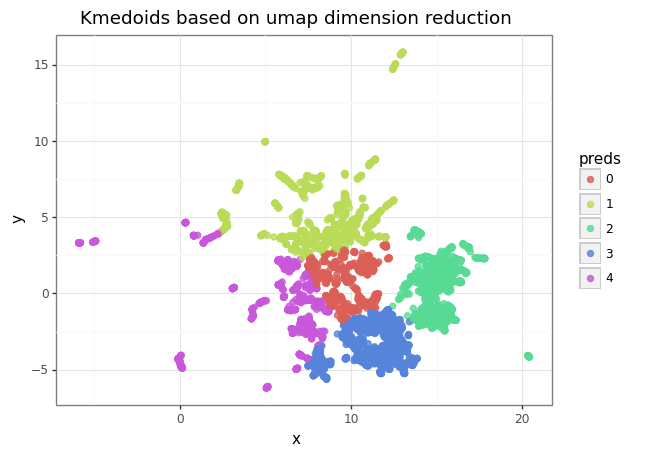

<ggplot: (125956714154)>

In [112]:
p2 = (p9.ggplot(df, p9.aes(x='x', y='y', fill='preds', color='preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('Kmedoids based on umap dimension reduction')
      + p9.theme_bw())
p2

In [113]:
# CAH with umap
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

In [116]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


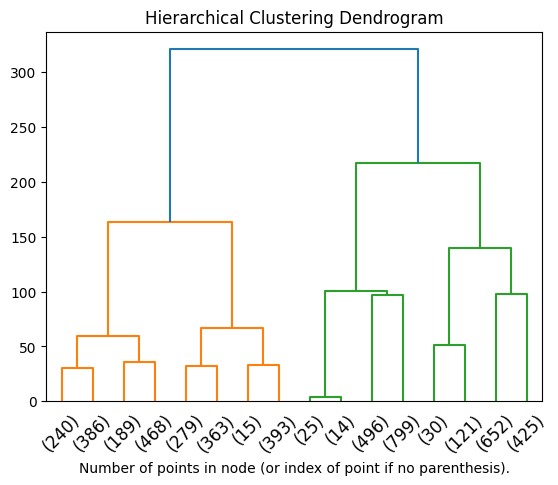

In [118]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(umap_embeddings)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=45)
plt.show()

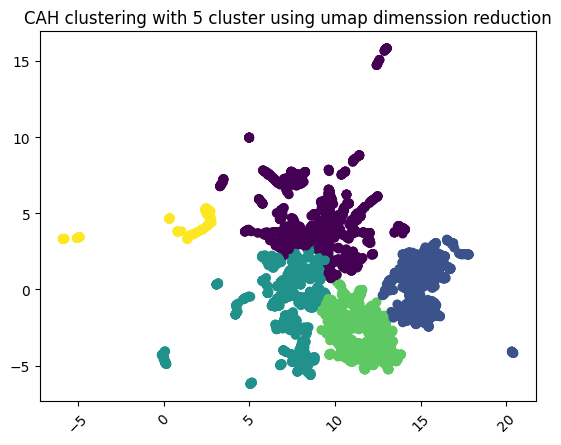

In [121]:
# using 5 cluster
model = AgglomerativeClustering(n_clusters=5)
model = model.fit(umap_embeddings)
plt.title("CAH clustering with 5 cluster using umap dimenssion reduction")
# plot the top three levels of the dendrogram
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=model.labels_)
plt.xticks(rotation=45)
plt.show()